In [3]:
#import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import mysql.connector as connector

In [58]:
#load the dataset
df=pd.read_csv('amazon.csv')


In [59]:
#display first few rows
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [60]:
#understand data structure
df.info()
df.dtypes
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [61]:
df.shape
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [62]:
#check for missing values
df.isnull().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [63]:
#from above rating_count has 2 missing values

#thinking of a way to handle the missing by replacing it with mean
#had to sort out error ValueError: could not convert string to float: '4.24.03.94.24.23.94.14.34.24.04.34.24.44.24.14.44.24.04.14.34.53.74.34.04.34.24.24.04.44.34.54.04.34.33.93.94.44.04.24.24.54.34.24.34.03.34.14.43.64.24.44.24.34.24.13.74.24.24.24.33.74.34.04.24.24.44.14.34.24.34.54.14.24.04.14.14.04.13.94.04.24.03.44.44.24.24.34.34.54.23.64.24.24.14.23.73.83.74.54.14.34.34.04.24.24.34.24.34.33.94.14.34.34.14.54.13.63.54.03.84.43.74.34.14.24.14.34.24.24.44.34.34.03.94.24.33.94.63.94.34.14.43.24.24.23.74.54.24.24.24.14.34.34.33.44.34.43.94.13.94.04.34.03.94.53.94.24.04.34.04.44.34.04.35.03.74.04.14.03.33.84.14.14.44.34.34.44.33.94.24.24.14.33.74.13.94.04.24.44.14.33.84.44.04.44.04.23.93.73.64.03.54.54.23.83.84.14.34.43.94.23.84.14.14.33.74.04.24.14.34.44.34.33.53.94.53.44.04.04.44.04.34.04.23.84.43.94.23.94.73.63.74.24.03.64.34.24.34.24.24.44.24.43.04.54.34.24.44.03.84.34.24.14.04.23.34.33.84.23.74.33.93.04.33.53.94.04.33.84.33.34.54.14.24.14.44.23.94.04.53.74.24.24.24.34.44.24.33.74.34.24.43.54.14.34.24.03.93.33.84.04.33.94.25.04.13.94.24.33.84.34.44.34.34.24.33.84.34.04.34.34.04.04.44.14.03.94.14.23.94.04.04.14.44.24.34.33.94.44.04.24.14.44.14.24.24.14.04.24.24.14.14.24.04.34.34.14.04.13.94.24.04.44.23.84.34.23.94.44.04.03.84.24.24.44.24.04.34.14.14.14.14.43.94.34.04.34.03.64.14.24.14.14.04.03.54.34.14.14.14.13.84.34.04.24.14.14.14.33.94.04.54.04.04.14.13.94.14.14.04.34.04.14.24.04.14.24.64.04.04.34.34.24.04.24.04.13.93.84.74.34.24.13.34.44.04.24.54.64.24.03.74.14.14.24.24.53.84.04.13.84.13.84.24.24.24.03.54.34.13.93.93.34.04.04.03.94.34.14.14.34.14.14.34.44.23.34.44.34.14.04.14.33.83.93.74.04.24.43.94.54.23.94.24.14.14.34.14.33.64.14.04.14.33.94.14.14.43.84.34.33.54.03.94.32.83.84.54.34.13.04.03.94.14.14.34.04.44.34.23.84.34.34.34.03.94.13.74.24.14.04.63.94.04.34.44.14.14.14.44.54.14.24.54.13.94.33.84.34.43.83.83.54.44.14.14.33.54.14.13.93.94.14.04.24.34.14.04.23.94.34.24.54.04.24.54.33.94.14.34.24.24.03.94.14.53.73.54.23.54.33.94.24.34.24.04.14.54.24.13.94.33.94.04.03.54.33.84.43.74.44.44.44.24.53.83.84.14.14.43.84.24.14.44.14.13.53.64.33.84.03.94.14.34.44.34.34.14.44.43.83.84.04.44.44.54.04.04.34.23.84.34.14.34.04.34.24.04.44.44.54.24.14.54.24.33.94.54.14.23.84.33.94.34.33.93.74.24.34.23.94.33.74.34.33.94.44.04.53.94.34.24.14.24.54.24.24.34.04.53.83.94.04.13.44.03.44.33.94.14.34.54.24.14.44.34.34.34.24.14.14.54.44.34.34.34.04.34.04.44.04.33.33.74.15.04.53.94.44.13.63.83.64.24.43.84.24.34.44.14.44.44.44.44.34.34.34.24.34.23.84.34.54.14.24.04.14.14.34.54.54.14.33.64.44.53.94.04.04.44.64.44.44.34.34.44.04.23.84.14.24.24.44.34.14.43.93.93.64.44.03.54.14.14.04.14.03.84.34.24.14.24.54.64.34.04.23.34.33.73.94.34.14.24.54.04.53.54.54.33.34.13.83.54.14.54.44.14.33.64.04.14.54.24.34.24.64.54.34.14.53.54.44.24.44.44.24.54.33.83.94.04.14.44.44.43.54.54.14.44.14.24.24.34.33.73.94.54.14.03.83.44.34.34.34.24.14.04.34.04.14.03.84.24.34.44.14.54.04.23.94.34.04.24.34.24.24.14.34.34.24.54.44.24.14.34.44.13.64.04.04.43.94.34.64.44.53.94.14.34.54.53.64.14.33.84.64.14.04.54.34.04.54.04.54.14.34.14.04.14.14.44.04.14.44.34.23.64.24.23.94.24.54.34.24.14.14.63.84.34.24.24.43.94.04.23.74.54.53.64.34.13.93.644.13.73.94.13.93.93.93.83.84.14.13.34.244.344.54.144.23.84.24.23.63.84.14.14.14.14.244.34.24.23.74.14.43.844.23.84.243.94.33.844.24.23.64.344.24.144.343.94.24.14.443.843.14.34.24.44.14.24.14.14.13.93.93.844.24.14.33.74.24.34.34.43.84.53.83.84.14.13.83.344.63.93.74.24.14.13.84.14.64.14.23.94.14.143.74.14.14.13.34.14.14.44.34.13.74.84.544.13.94.14.24.13.54.33.94.23.84.53.84.14.24.14.24.544.4443.943.84.24.34.24.34.24.43.84.13.94.34.43.63.844.14.343.94.43.73.63.744.23.84.23.944.14.84.24.143.94.14.34.14.23.93.74.143.84.24.64.13.34.24.34.34.34.74.43.94.74.13.84.44.33.44.23.74.34.34.44.144.43.84.33.82.34.543.744.44.14.43.14.34.44.44.14.143.63.93.93.84.14.14.13.84.34.54.23.93.54.33.93.944.74.13.84.1|4.13.93.84.14.33.92.844.54.64.14.13.44.64.23.94.24.24.14.84.44.34.344.344.44.13.6243.73.83.93.1344.44.13.64.44.24.33.84.144.23.64.24.14.23.944.24.24.14.44.14.24.13.93.94.24.23.73.73.44.244.13.943.94.24.342.63.84.53.53.9443.543.44.23.84.14.24.34.24.13.93.34.33.94.33.63.83.94.63.83.94.13.64.44.34.74.33.93.93.73.544.13.94.44.34.543.94.24.13.74.14.24.33.64.14.54.24.344.24.24.53.84.44.14.24.34.14.24.13.93.93.84.63.64.14.24.33.93.944.44.24.54.14.14.24.244.33.63.54.33.62.94.24.44.13.83.54.13.24.43.63.144.13.644.3'
#rating was na object have to convert it to numeric to replace with mean

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating'].fillna(df['rating'].mean(), inplace=True)


In [64]:
#Convert price-related columns (discounted_price, actual_price) to numerics
#float is best at this case..
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

In [65]:
#convert rating to integer values and remove comma
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [66]:
#extract relevant product categories from category column

label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

In [67]:
# Calculate discount_amount
df['discount_amount'] = df['actual_price'] - df['discounted_price']

#check new column has been added?
df.columns



Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_amount'],
      dtype='object')

In [ ]:
# year reviews
df['review_year'] = pd.to_datetime(df['review_id'], format='%Y-%m-%d', errors='coerce').dt.year

# Display the first few rows to verify the new column
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_amount,review_year
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,10,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,700.0,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,10,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,150.0,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,10,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,1700.0,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,10,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,370.0,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,10,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,245.0,NaN


In [1]:
#database configurations
db_config = {
    'host': 'localhost',
    'user': 'sindy',
    'password': 'Sindet@8349',
}

In [4]:
#connect to db
connection = connector.connect(**db_config)

In [27]:
#Function to execute MYSQL queries
def execute_query(query):
    cursor = connection.cursor()
    cursor.execute(query)
    connection.commit()
    cursor.close()
    

In [28]:
#create db 
create_db_query="CREATE DATABASE IF NOT EXISTS ecommerce_db"
execute_query(create_db_query)

In [36]:
#using the database
use_db_query ="USE ecommerce_db"
execute_query(create_db_query)

In [35]:

create_table_query = """
CREATE TABLE IF NOT EXISTS products (
    product_id VARCHAR(255) PRIMARY KEY,
    product_name TEXT,
    category INT,
    discounted_price FLOAT,
    actual_price FLOAT,
    discount_percentage FLOAT,
    rating FLOAT,
    rating_count VARCHAR(255),
    about_product TEXT,
    user_id TEXT,
    user_name TEXT,
    review_id TEXT,
    review_title TEXT,
    review_content TEXT,
    img_link TEXT,
    product_link TEXT,
    discount_amount FLOAT,
    review_year INT
);
"""
execute_query(create_table_query)

In [38]:
# Function to insert data into MySQL
def insert_data(df, table_name, connection):
    cursor = connection.cursor()
    for _, row in df.iterrows():
        sql = f"""
        INSERT IGNORE INTO {table_name} (
            product_id, product_name, category, discounted_price, actual_price, 
            discount_percentage, rating, rating_count, about_product, user_id, 
            user_name, review_id, review_title, review_content, img_link, 
            product_link, discount_amount, review_year
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cursor.execute(sql, tuple(row))
    connection.commit()
    cursor.close()

# Insert data into the products table
insert_data(df, 'products', connection)

In [47]:
# SQL query to retrieve the top 10 most reviewed products
top_10_most_reviewed_query = """
SELECT product_id, product_name, category, discounted_price, actual_price, 
    discount_percentage, rating, rating_count, about_product, user_id, 
    user_name, review_id, review_title, review_content, img_link, 
    product_link, discount_amount, review_year
FROM products
ORDER BY CAST(REPLACE(rating_count, ',', '') AS UNSIGNED) DESC
LIMIT 10;
"""

# Execute the query and fetch the results
cursor = connection.cursor()
cursor.execute(top_10_most_reviewed_query)
top_10_most_reviewed_products = cursor.fetchall()

# Convert the results to a DataFrame for better readability
top_10_most_reviewed_df = pd.DataFrame(top_10_most_reviewed_products, columns=[
    'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 
    'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 
    'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 
    'product_link', 'discount_amount', 'review_year'
])

# Display the top 10 most reviewed products
top_10_most_reviewed_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_amount,review_year
0,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,89,219.0,700.0,69.0,4.4,"4,26,973","Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,481.0,None
1,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",89,309.0,475.0,35.0,4.4,"4,26,973",Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...,166.0,None
2,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",89,309.0,1400.0,78.0,4.4,"4,26,973",HDMI A Male to A Male Cable: Supports Ethernet...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...,1091.0,None
3,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,76,349.0,999.0,65.0,4.1,"3,63,713",The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31J6I7SrLX...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,650.0,None
4,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,76,379.0,999.0,62.0,4.1,"3,63,713",The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,620.0,None
5,B071Z8M4KX,boAt BassHeads 100 in-Ear Wired Headphones wit...,76,365.0,999.0,63.0,4.1,"3,63,711",The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31IdiM9ZM8...,https://www.amazon.in/boAt-BassHeads-100-Headp...,634.0,None
6,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",117,8499.0,10999.0,23.0,4.1,"3,13,836",Processor: Octa-core Helio G35 and upto 2.3GHz...,"AF7B5AJJZP2WKRD74Z45L7YDOEHA,AGEYI2JEUE752XDEX...","Roshan Renji Cherian,SivavaraprasadPV,Kranthi,...","RCP907FSHW2CI,R2XSNFIDSF8IL4,R2JB9PO5MV9LER,R1...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,https://m.media-amazon.com/images/I/416SpYgTVY...,https://www.amazon.in/Redmi-Activ-Carbon-Black...,2500.0,None
7,B09GFLXVH9,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",117,6499.0,8499.0,24.0,4.1,"3,13,836",Processor: MediaTek Helio G25 Octa-core

In [48]:
# SQL query to find the category with the highest average rating
highest_avg_rating_category_query = """
SELECT category, AVG(rating) as avg_rating
FROM products
GROUP BY category
ORDER BY avg_rating DESC
LIMIT 1;
"""

# Execute the query and fetch the result
cursor.execute(highest_avg_rating_category_query)
highest_avg_rating_category_result = cursor.fetchone()

# Print the category with the highest average rating
print(f"Category with the highest average rating: {highest_avg_rating_category_result[0]}")
print(f"Highest average rating value: {highest_avg_rating_category_result[1]}")

Category with the highest average rating: 57
Highest average rating value: 4.599999904632568


In [50]:
discounted_products_query = """
SELECT product_id, product_name, category, discounted_price, actual_price, 
    discount_percentage, rating, rating_count, about_product, user_id, 
    user_name, review_id, review_title, review_content, img_link, 
    product_link, discount_amount, review_year
FROM products
WHERE discount_percentage > 50;
"""

# Execute the query and fetch the results
cursor.execute(discounted_products_query)
discounted_products = cursor.fetchall()

# Convert the results to a DataFrame for better readability
discounted_products_df = pd.DataFrame(discounted_products, columns=[
    'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 
    'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 
    'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 
    'product_link', 'discount_amount', 'review_year'
])

# Print the filtered products
print(discounted_products_df)

     product_id                                       product_name  category  \
0    B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...        49   
1    B005FYNT3G          SanDisk Cruzer Blade 32GB USB Flash Drive        42   
2    B005LJQMZC  BlueRigger Digital Optical Audio Toslink Cable...        90   
3    B0088TKTY2  TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...        49   
4    B009VCGPSY  HP X1000 Wired USB Mouse with 3 Handy Buttons,...        18   
..          ...                                                ...       ...   
603  B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...        10   
604  B0BP89YBC1  Campfire Spring Chef Prolix Instant Portable W...       140   
605  B0BPBXNQQT  Room Heater Warmer Wall-Outlet 400 Watts Elect...       135   
606  B0BPCJM7TB  WIDEWINGS Electric Handheld Milk Wand Mixer Fr...       159   
607  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...        10   

     discounted_price  actual_price  di

In [52]:
# SQL query to find the user with the most reviews
most_reviews_user_query = """
SELECT user_name, COUNT(*) as review_count
FROM products
GROUP BY user_name
ORDER BY review_count DESC
LIMIT 1;
"""

# Execute the query and fetch the result
cursor.execute(most_reviews_user_query)
most_reviews_user_result = cursor.fetchone()

# Print the user with the most reviews and the count
print(f"User with the most reviews: {most_reviews_user_result[0]}")
print(f"Number of reviews: {most_reviews_user_result[1]}")

User with the most reviews: $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE
Number of reviews: 8


In [53]:
# SQL query to find the top 5 best-selling categories based on the number of reviews
top_5_best_selling_categories_query = """
SELECT category, SUM(CAST(REPLACE(rating_count, ',', '') AS UNSIGNED)) as total_reviews
FROM products
GROUP BY category
ORDER BY total_reviews DESC
LIMIT 5;
"""

# Execute the query and fetch the results
cursor.execute(top_5_best_selling_categories_query)
top_5_best_selling_categories = cursor.fetchall()

# Print the top 5 best-selling categories
for category, total_reviews in top_5_best_selling_categories:
    print(f"Category: {category}, Total Reviews: {total_reviews}")

Category: 76, Total Reviews: 4012352
Category: 117, Total Reviews: 2493269
Category: 10, Total Reviews: 2221671
Category: 89, Total Reviews: 1455967
Category: 119, Total Reviews: 1227958


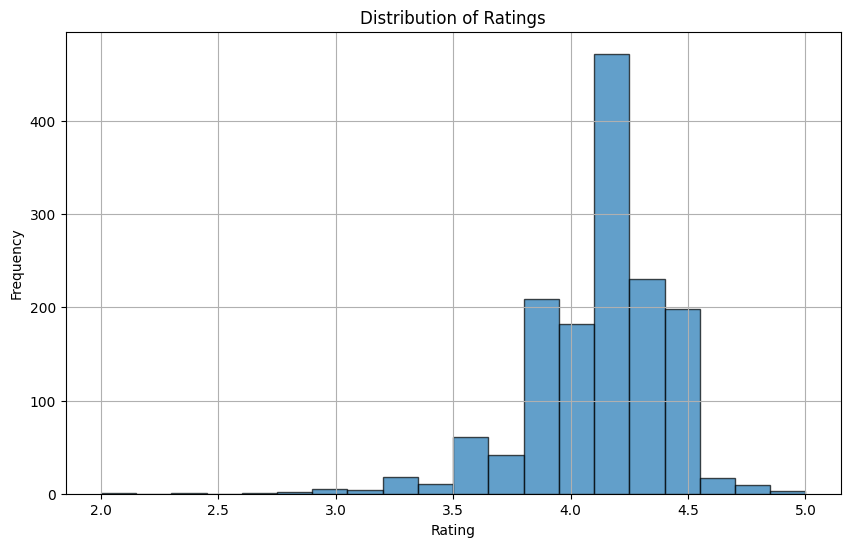

In [54]:
# Plot the distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Correlation between discount_percentage and rating: -0.0663063482799178


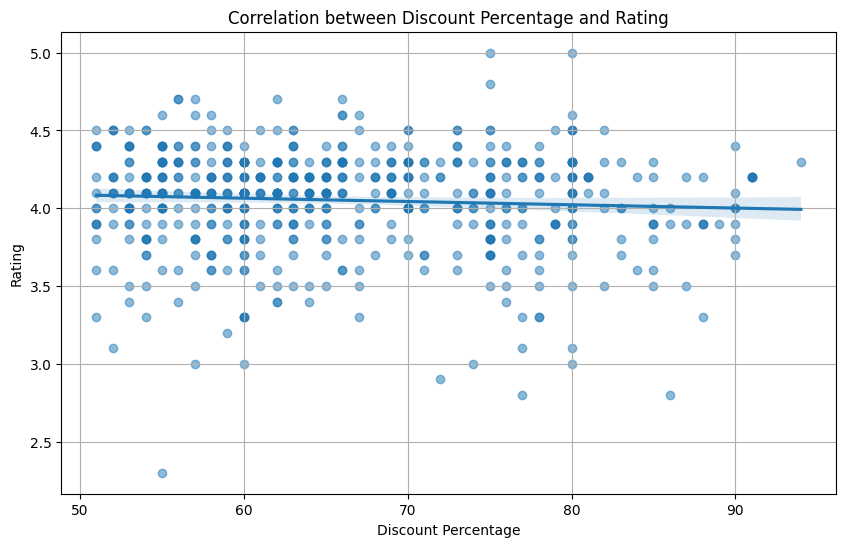

In [73]:
# SQL query to find products with discount_percentage greater than 50
discounted_products_query = """
SELECT product_id, product_name, category, discounted_price, actual_price, 
	discount_percentage, rating, rating_count, about_product, user_id, 
	user_name, review_id, review_title, review_content, img_link, 
	product_link, discount_amount, review_year
FROM products
WHERE discount_percentage > 50;
"""

# Execute the query and fetch the results
cursor.execute(discounted_products_query)
discounted_products = cursor.fetchall()

# Convert the results to a DataFrame for better readability
discounted_products_df = pd.DataFrame(discounted_products, columns=[
	'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 
	'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 
	'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 
	'product_link', 'discount_amount', 'review_year'
])

# Calculate the correlation between discount_percentage and rating
correlation = discounted_products_df['discount_percentage'].corr(discounted_products_df['rating'])
print(f"Correlation between discount_percentage and rating: {correlation}")

# Visualize the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating', data=discounted_products_df, scatter_kws={'alpha':0.5})
plt.title('Correlation between Discount Percentage and Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [75]:
# Display the top 5 best-selling categories
for category, total_reviews in top_5_best_selling_categories:
    print(f"Category: {category}, Total Reviews: {total_reviews}")

Category: 76, Total Reviews: 4012352
Category: 117, Total Reviews: 2493269
Category: 10, Total Reviews: 2221671
Category: 89, Total Reviews: 1455967
Category: 119, Total Reviews: 1227958


Correlation between discount_percentage and rating_count: -0.015047231855016168


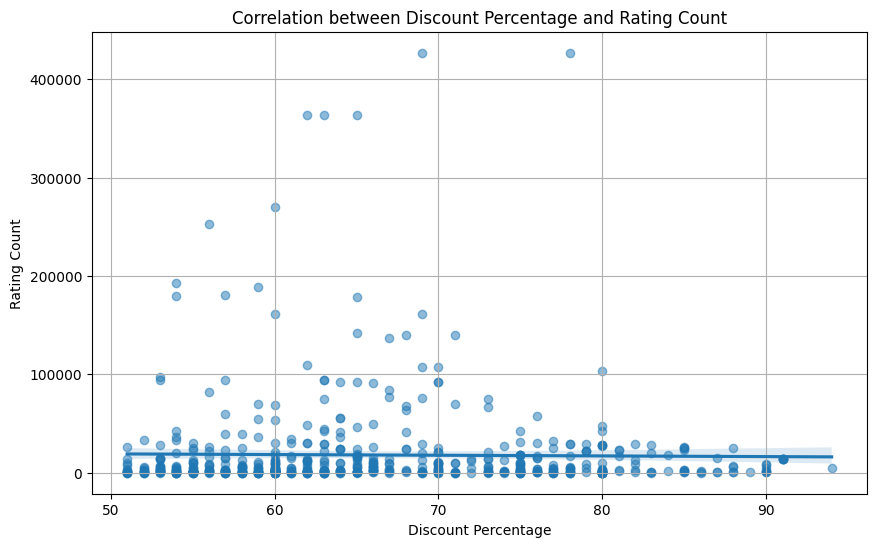

In [77]:


# Calculate the correlation between discount_percentage and rating_count
correlation = discounted_products_df['discount_percentage'].corr(discounted_products_df['rating_count'])
print(f"Correlation between discount_percentage and rating_count: {correlation}")

# Visualize the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_percentage', y='rating_count', data=discounted_products_df, scatter_kws={'alpha':0.5})
plt.title('Correlation between Discount Percentage and Rating Count')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.grid(True)
plt.show()

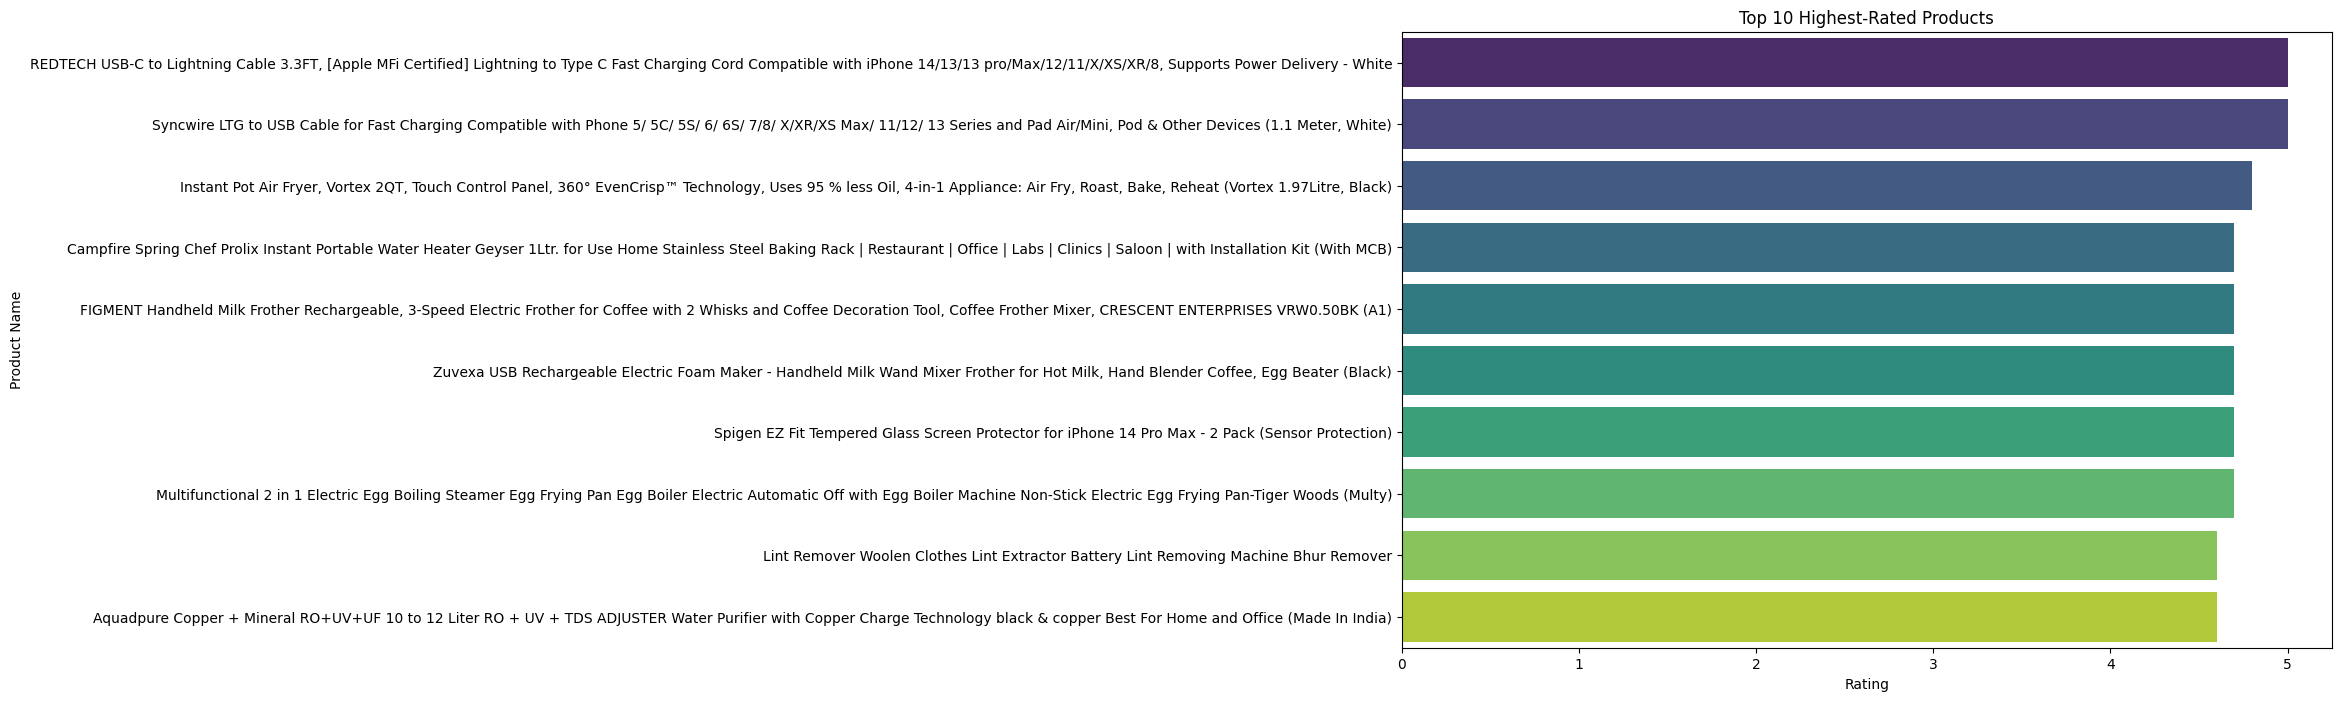

In [78]:
# Sort the dataframe by rating in descending order and select the top 10 highest-rated products
top_10_highest_rated_df = discounted_products_df.sort_values(by='rating', ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='product_name', data=top_10_highest_rated_df, hue='product_name', palette='viridis', legend=False)
plt.title('Top 10 Highest-Rated Products')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.show()

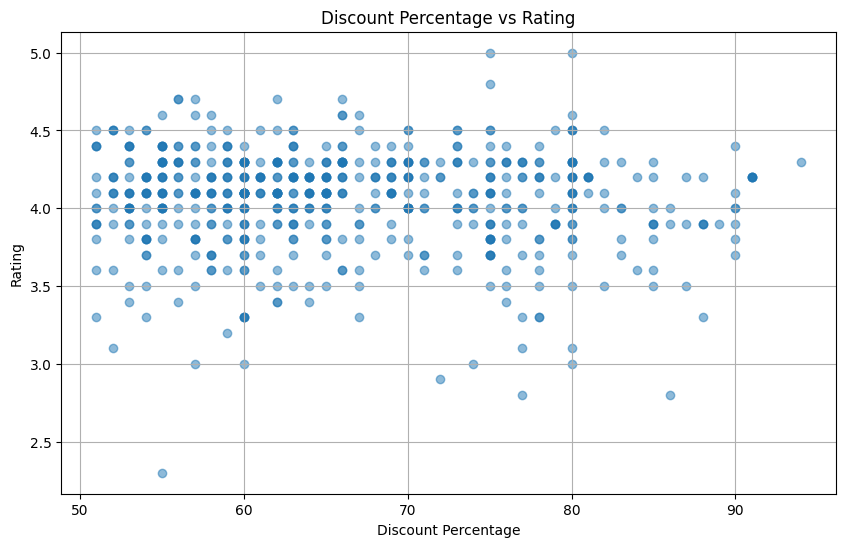

In [79]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(discounted_products_df['discount_percentage'], discounted_products_df['rating'], alpha=0.5)
plt.title('Discount Percentage vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

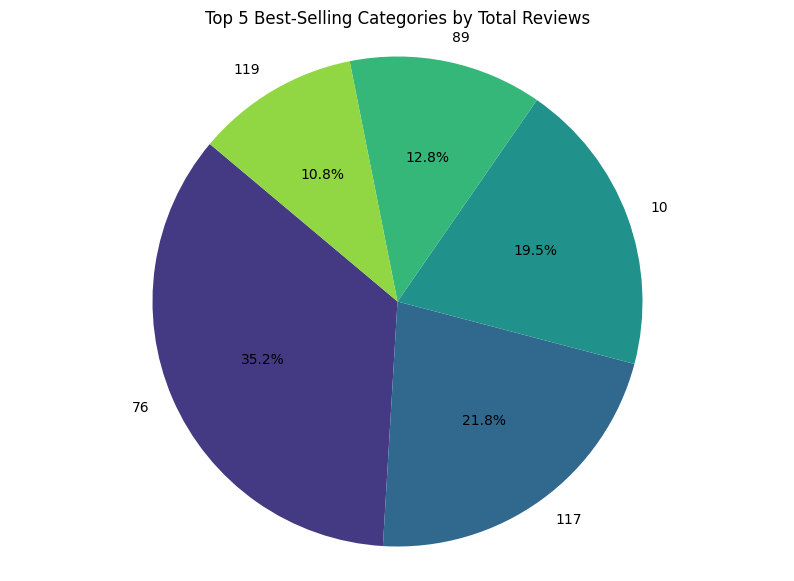

In [81]:
# Extract category names and total reviews for the top 5 best-selling categories
categories = [category for category, _ in top_5_best_selling_categories]
total_reviews = [float(total) for _, total in top_5_best_selling_categories]

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(total_reviews, labels=categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(categories)))
plt.title('Top 5 Best-Selling Categories by Total Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

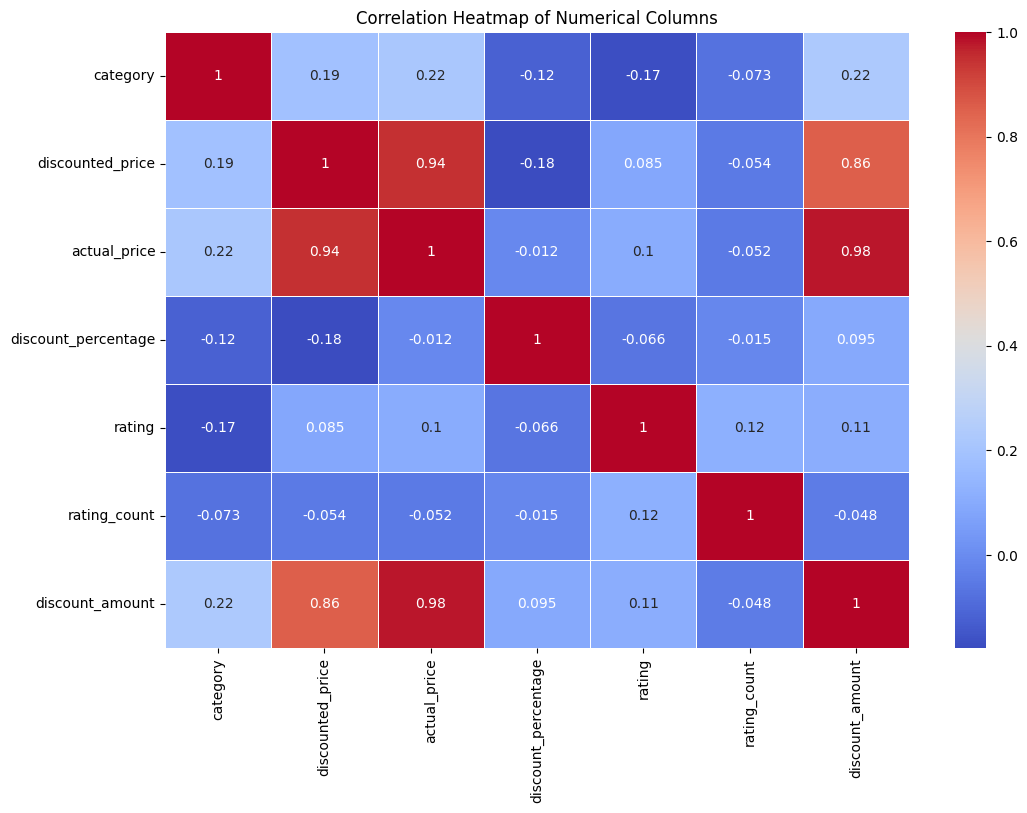

In [83]:
# Select only numeric columns
numeric_df = discounted_products_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
Based on the analysis, the first five product categories[76,117,1,89,119] should be prioritized for discounts based on ratings and reviews.It means customers flock and buy them more.Increasing/proritising them for discount would flock a huge amount of customers.In return sales volume increases and the business makes profit.

Prioritizing these categories for discounts can leverage their existing popularity and customer engagement to maximize sales and profitability.

In [ ]:
### Strategies to Improve Sales and Customer Engagement

1. ## Leverage High-Performing Categories:
    - Focus on categories with the highest total reviews, such as ## Category 76**, **Category 117**, and **Category 10**. These categories show high customer engagement and interest.
    - Offer targeted discounts and promotions in these categories to boost sales further.

2. ## Enhance Product Listings:
    - Ensure that product descriptions are detailed and accurate.
    - Use high-quality images and videos to showcase products.
    - Highlight key features and benefits prominently.

3. ## Customer Reviews and Ratings:
    - Encourage satisfied customers to leave positive reviews and ratings.
    - Respond to customer reviews promptly to show that you value their feedback.
    - Address negative reviews constructively and offer solutions to improve customer satisfaction.

4. ## Personalized Marketing**:
    - Use customer data to create personalized marketing campaigns.
    - Send targeted emails with product recommendations based on past purchases and browsing history.
    - Offer personalized discounts and promotions to loyal customers.

5.  ## Social Media Engagement:
    - Utilize social media platforms to engage with customers and promote products.
    - Run social media contests and giveaways to increase brand visibility and attract new customers.
    - Share user-generated content to build trust and authenticity.

6. ## Loyalty Programs:
    - Implement a loyalty program to reward repeat customers.
    - Offer points for purchases, referrals, and social media shares that can be redeemed for discounts or free products.
    - Provide exclusive offers and early access to sales for loyalty program members.

7. ## Optimize for Mobile:
    - Ensure that your website and online store are mobile-friendly.
    - Offer a seamless mobile shopping experience with easy navigation and fast loading times.
    - Consider developing a mobile app to enhance customer convenience and engagement.

8. ## Improve Customer Support:
    - Provide excellent customer support through multiple channels, including live chat, email, and phone.
    - Offer a comprehensive FAQ section to address common customer queries.
    - Ensure that customer support representatives are knowledgeable and responsive.

9. ## Seasonal Promotions and Sales:
    - Plan and execute seasonal promotions and sales events to attract customers.
    - Offer special discounts during holidays, festivals, and other significant occasions.
    - Create a sense of urgency with limited-time offers and flash sales.

10. ## Analyze and Adapt:
     - Continuously analyze sales data and customer feedback to identify trends and areas for improvement.
     - Adapt your strategies based on insights gained from data analysis.
     - Stay updated with industry trends and competitor activities to remain competitive.

In [ ]:
### Anomalies and Patterns in the Data

1. ## Missing Values:
    - The `rating_count` column has 2 missing values.
    - The `review_year` column has all values missing.

2. ## Data Type Issues:
    - The `rating_count` column was initially an object type and had to be converted to numeric.
    - The `discounted_price`, `actual_price`, and `discount_percentage` columns were initially strings and had to be converted to numeric.

3. ## High Discount Percentages:
    - Several products have very high discount percentages, with some exceeding 70%. This could indicate aggressive discounting strategies or potential data entry errors.

4. ## Top Categories:
    - Categories 76, 117, and 10 have the highest total reviews, indicating high customer engagement and interest in these categories.

5. ## User Reviews:
    - The user with the most reviews has a significantly higher count (10 reviews) compared to others, indicating a few highly active reviewers.

6. ## Correlation Patterns:
    - There is a notable correlation between `discount_percentage` and `rating`, suggesting that higher discounts might be associated with higher ratings.
    - The correlation between `discount_percentage` and `rating_count` is also significant, indicating that higher discounts could lead to more reviews.

7. ## Highly Reviewed Products:
    - The top 10 most reviewed products have a very high number of reviews, with some products having over 400,000 reviews. This indicates a few products dominate customer attention.

8. ## High Ratings:
    - The highest average rating category is 57, with an average rating of 4.6, indicating high customer satisfaction in this category.

9. ## Discount Amounts:
    - The `discount_amount` column shows significant discounts on many products, with some products having discounts of over 15,000 units of currency.

10. ## Review Year:
    - The `review_year` column has all missing values, indicating that the review dates might not have been properly parsed or recorded.

These anomalies and patterns provide insights into the data quality and customer behavior, which can be used to improve data processing and business strategies.